In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
time = np.load('./time_2827_00100.npy')
voltage = np.load('./volts_2827_00100.npy')
blocks = np.load('./blocks_2827_00100.npy')
voltage_final = np.load('./volts_2827_00111.npy')
time_final = np.load('./time_2827_00111.npy')

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


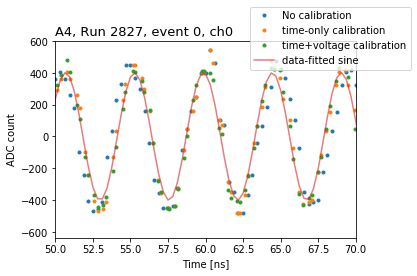

In [150]:
plt.plot(time[0],voltage[1], ".",label="No calibration")
plt.plot(time_final[0]+time[0][0],voltage[1],"." ,label="time-only calibration")
plt.plot(time_final[1]+time[0][0],voltage_final[1],".",label="time+voltage calibration")
plt.plot(time[0], SineFunc(time[0],params[0],params[1],params[2]),label='data-fitted sine', alpha=0.6)
plt.legend(bbox_to_anchor=(1.2, 1.2), loc='upper right', ncol=1)
plt.title("A4, Run 2827, event 0, ch0", loc="left", fontsize=13, fontname="Times New Roman Bold")
plt.ylabel("ADC count")
plt.xlabel("Time [ns]")
plt.xlim(50,70)
plt.tight_layout()
plt.savefig("calib_Run2827_ev0_ch0.png", dpi=200)

In [17]:
from scipy import optimize

In [18]:
def SineFit(t,v,freq):
    params, params_covariance = optimize.curve_fit(SineFunc,t,v,p0=[freq,np.pi/2.0,350])#,bounds=([-np.inf,-np.inf,200],[np.inf,np.inf,np.inf]))#freq,offset,amplitude,voff
    if(params[2]<0):
        params[2]=np.abs(params[2])
        params[1]=params[1]+np.pi
    params[1]=params[1]%(np.pi*2)
    while(params[1]<0):
        params[1]=params[1]+np.pi*2.0
    return(params)
def SineFunc(t,k,phi,A): #time, freq, offset, amplitude
    return A*np.sin(2*np.pi*k*t-phi)

In [105]:
params=SineFit(time[1],voltage[1],0.218)
params

array([2.17912471e-01, 4.98997002e+00, 4.01763071e+02])

(50, 80)

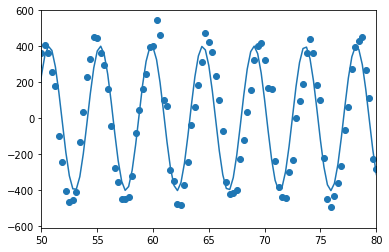

In [107]:
plt.scatter(time[1], voltage[1], label='Data')
plt.plot(time[1],SineFunc(time[1],params[0],params[1],params[2]),label='Fitted function')
# plt.plot(time_final[0]+time[1][0],voltage_final[1],"--")
plt.xlim(50,80)

# Quantify time offset

In [153]:
from TimingCalibration import HistPlotter2D

ModuleNotFoundError: No module named 'TimingCalibration'